In [ ]:
import numpy as np
from scipy.interpolate import interp1d
import matplotlib.pyplot as plt
import os
import sys
import configparser
sys.path.append(os.path.join('..'))
from physics215ProjectCode import reconstruct_signal as rs
from physics215ProjectCode import error_fn
from physics215ProjectCode import configParser as cP

In [ ]:
configpath = '../configs/config3.ini'
category = 'Figure3ExeSummary'

config = cP.parseConfig(configpath, category)

In [ ]:
n = int(config['n'])
initial_frequency = eval(config['initial_frequency'])
increments = eval(config['increments'])
t_end = int(config['t_end'])
t = np.linspace(0,t_end,n)
p = int(config['p'])

Testing the effects of spacing on the reconstruction of the signal.

Parameters:

Number of samples for above Nyquist reconstruction, n = 2 * final_frequency

Number of random samples for sub-Nyquist, p = 64

Spacings = 15, 45, 75, 150 [Hz]

In [ ]:
# "..._spacing means we are testing spacing"

PSD_orig_spacing = []
PSD_reg_spacing = []
PSD_sub_spacing = []
error_reg_spacing = []
error_sub_spacing = []

for i in increments:
    final_frequency = i * 4 + initial_frequency # 5 frequencies only for our signal

    # generating original signal
    orig_signal = rs.make_signal(n, initial_frequency, final_frequency, i)

    # reconstructing signal above Nyquist
    reg_signal = rs.nyquist_reconstruction(final_frequency * 2, orig_signal) # number of samples should be double the final frequency
    # interpolate reconstructed signal to match resolution of original signal
    n_low = len(reg_signal)
    t_low = np.linspace(0, 1, n_low)    
    interp_fn = interp1d(t_low, reg_signal, kind='cubic')
    signal_high = interp_fn(t)
    reg_signal = signal_high

    #reconstructing signal sub-Nyquist
    sub_signal = rs.sub_nyquist_reconstruction(p, orig_signal)

    # acquiring PSD of all signals
    PSD_orig = rs.PSD(orig_signal)
    PSD_reg = rs.PSD(reg_signal)
    PSD_sub = rs.PSD(sub_signal)
    PSD_orig_spacing.append(PSD_orig)
    PSD_reg_spacing.append(PSD_reg)
    PSD_sub_spacing.append(PSD_sub)

    # acquiring errors of the PSDs of the signals
    error_reg = error_fn.normalized_rmse(PSD_orig, PSD_reg)
    error_sub = error_fn.normalized_rmse(PSD_orig, PSD_sub)
    
    error_reg_spacing.append(np.abs(error_reg))
    error_sub_spacing.append(np.abs(error_sub))

Iteration 71

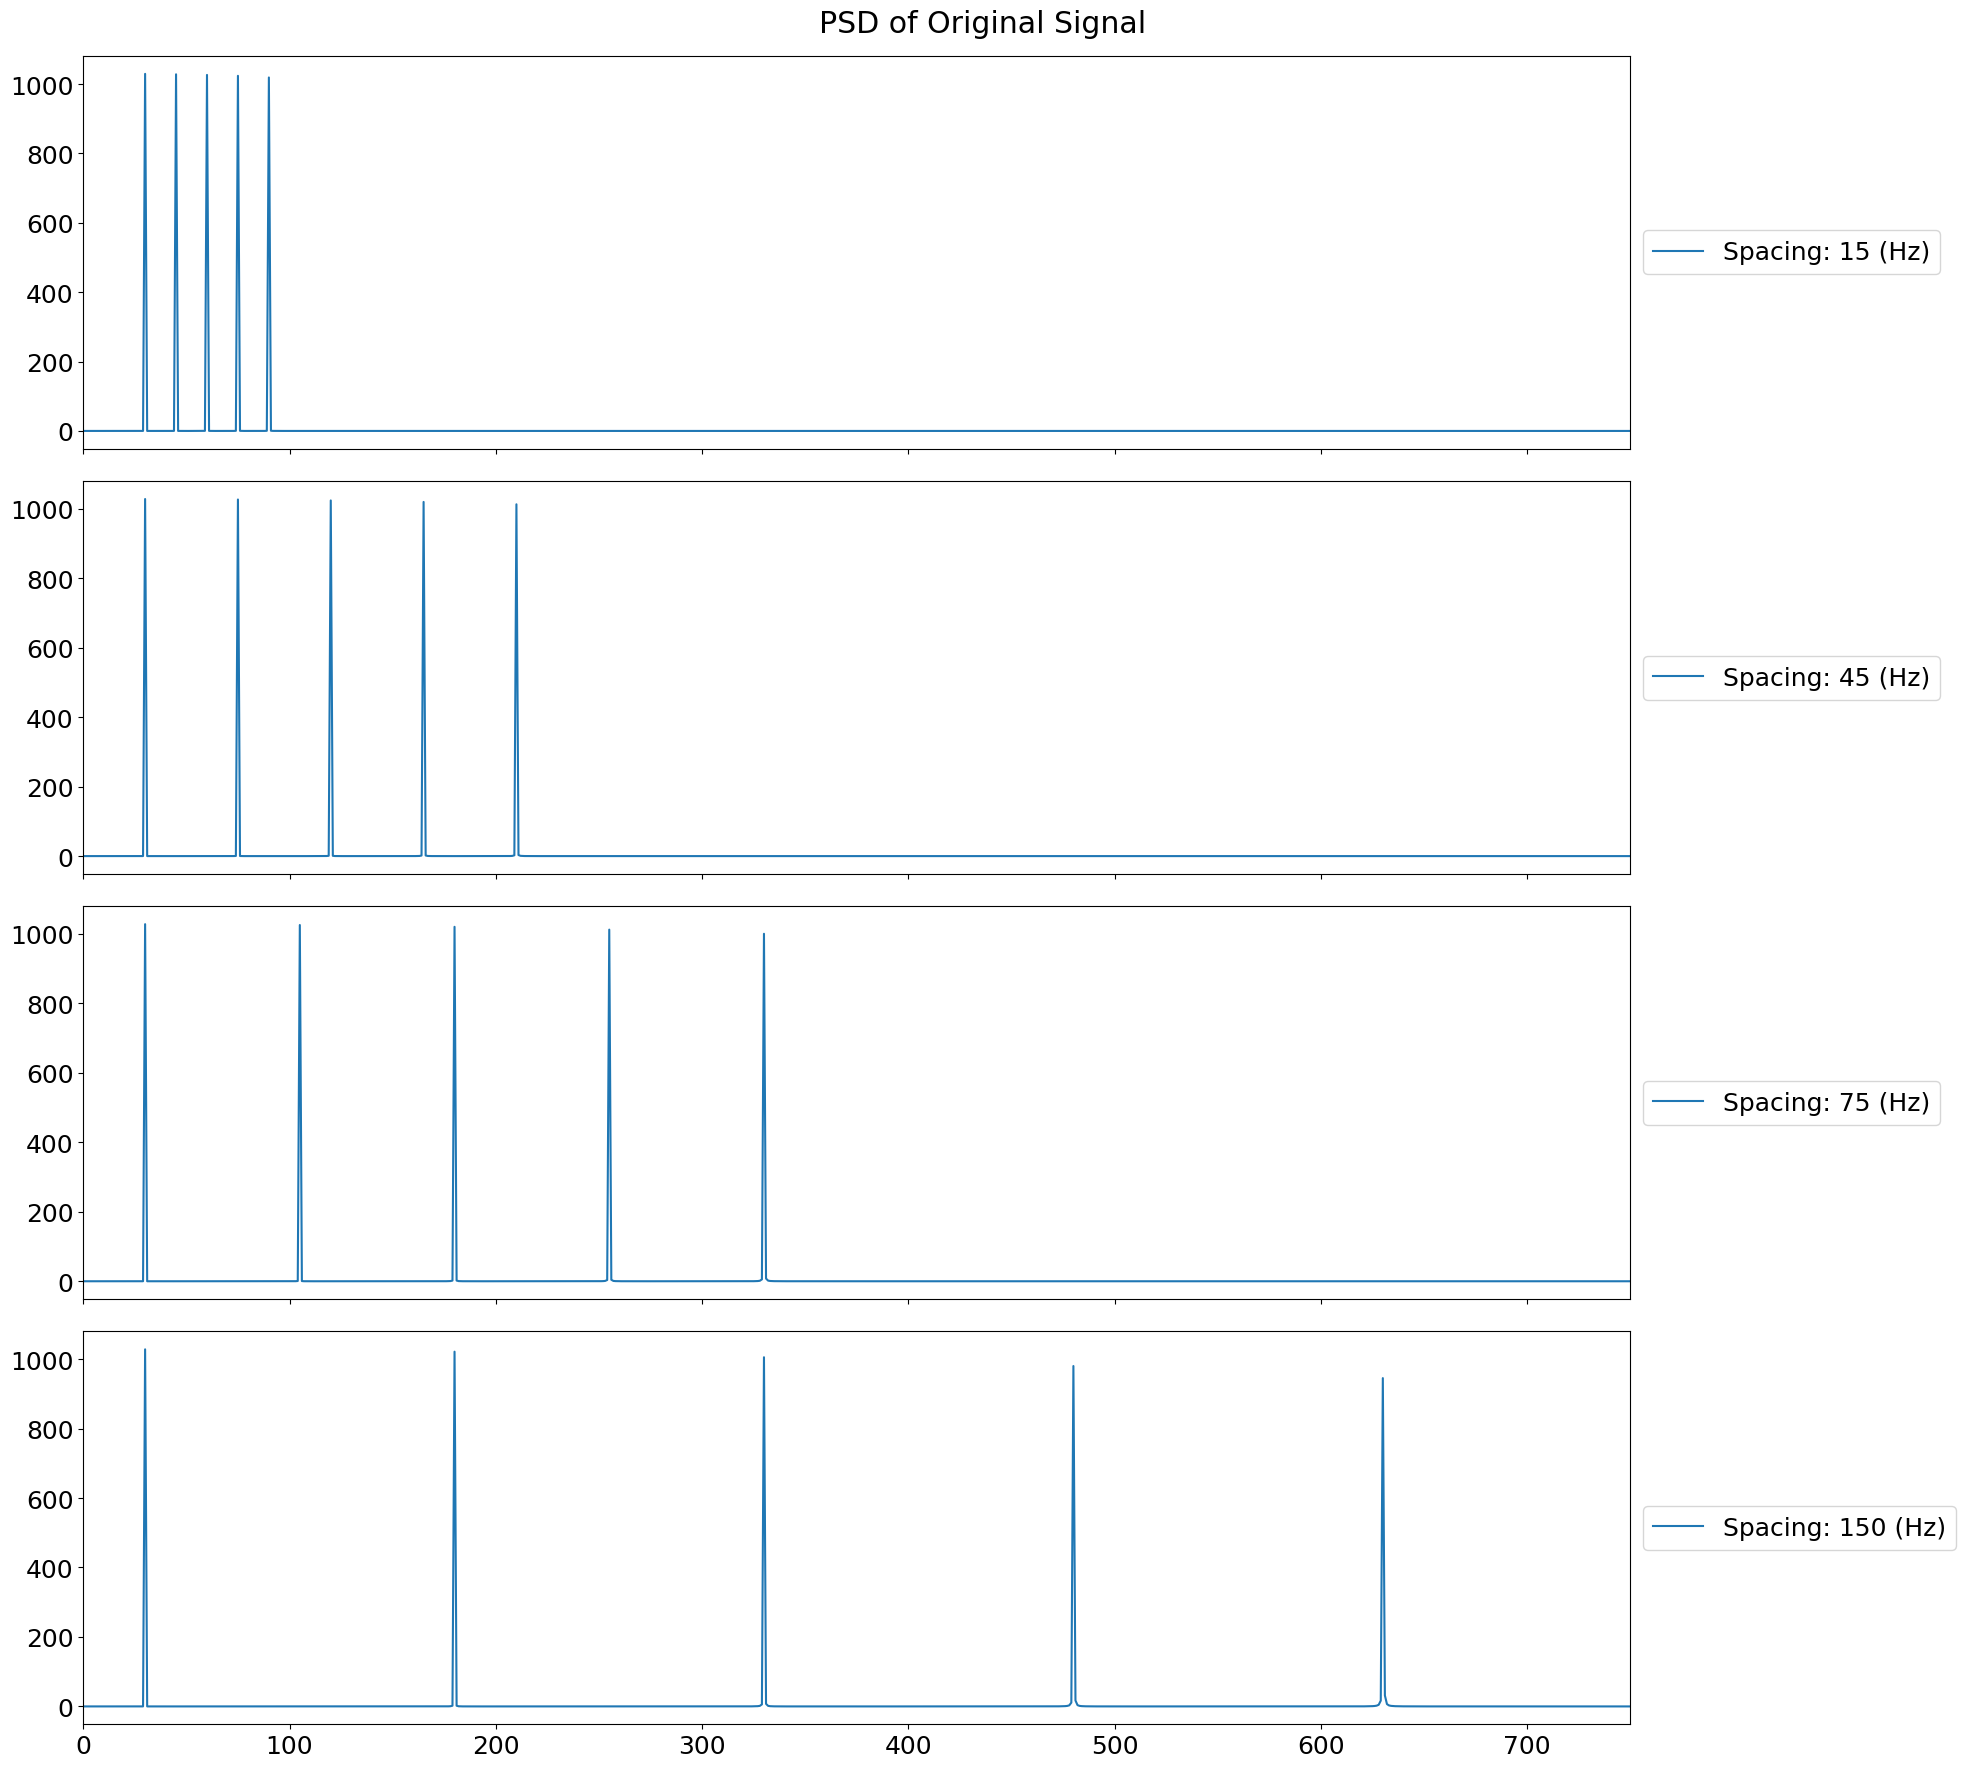

In [5]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(4,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)
frequency_x = np.arange(0,n)

for i, pt in enumerate(PSD_orig_spacing):
    axs[i].plot(np.abs(pt), label = "Spacing: " + str(increments[i]) + " (Hz)")
    axs[i].set_xlim(0,750)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Original Signal")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

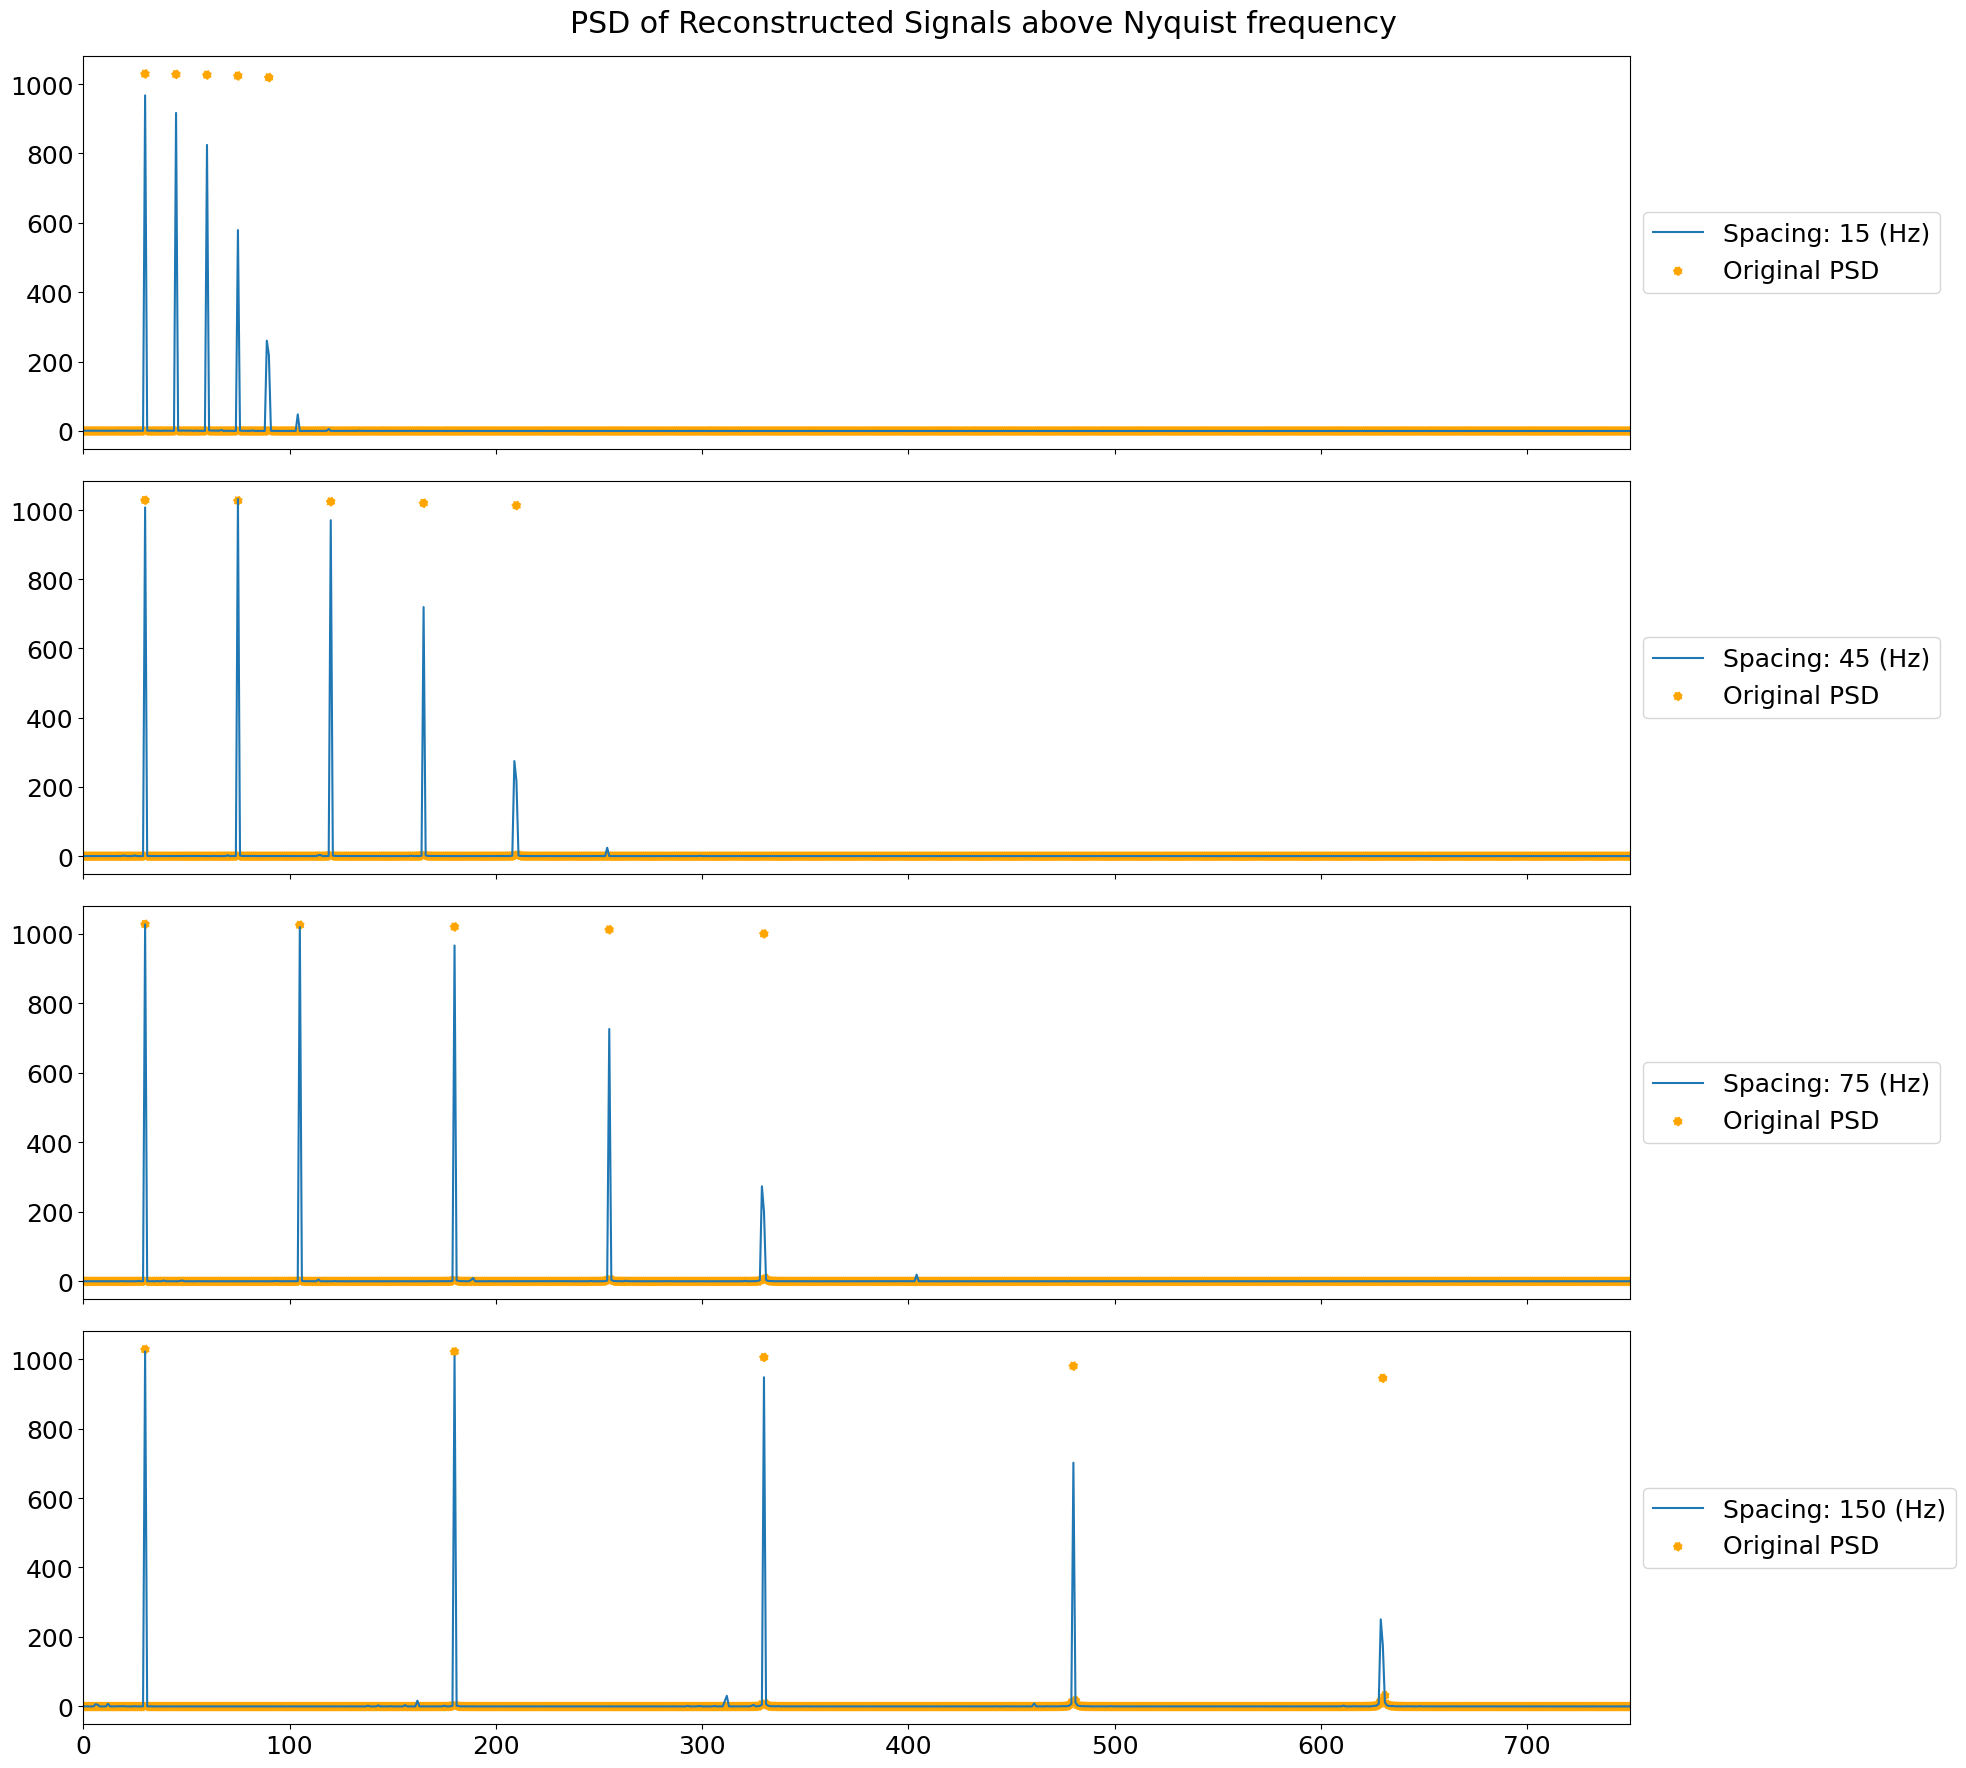

In [6]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(4,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(PSD_reg_spacing):
    axs[i].plot(np.abs(pt), label = "Spacing: " + str(increments[i]) + " (Hz)")
    axs[i].scatter(frequency_x, np.abs(PSD_orig_spacing[i]), linestyle = "dotted", label = "Original PSD", color = "orange")
    axs[i].set_xlim(0,750)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals above Nyquist frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

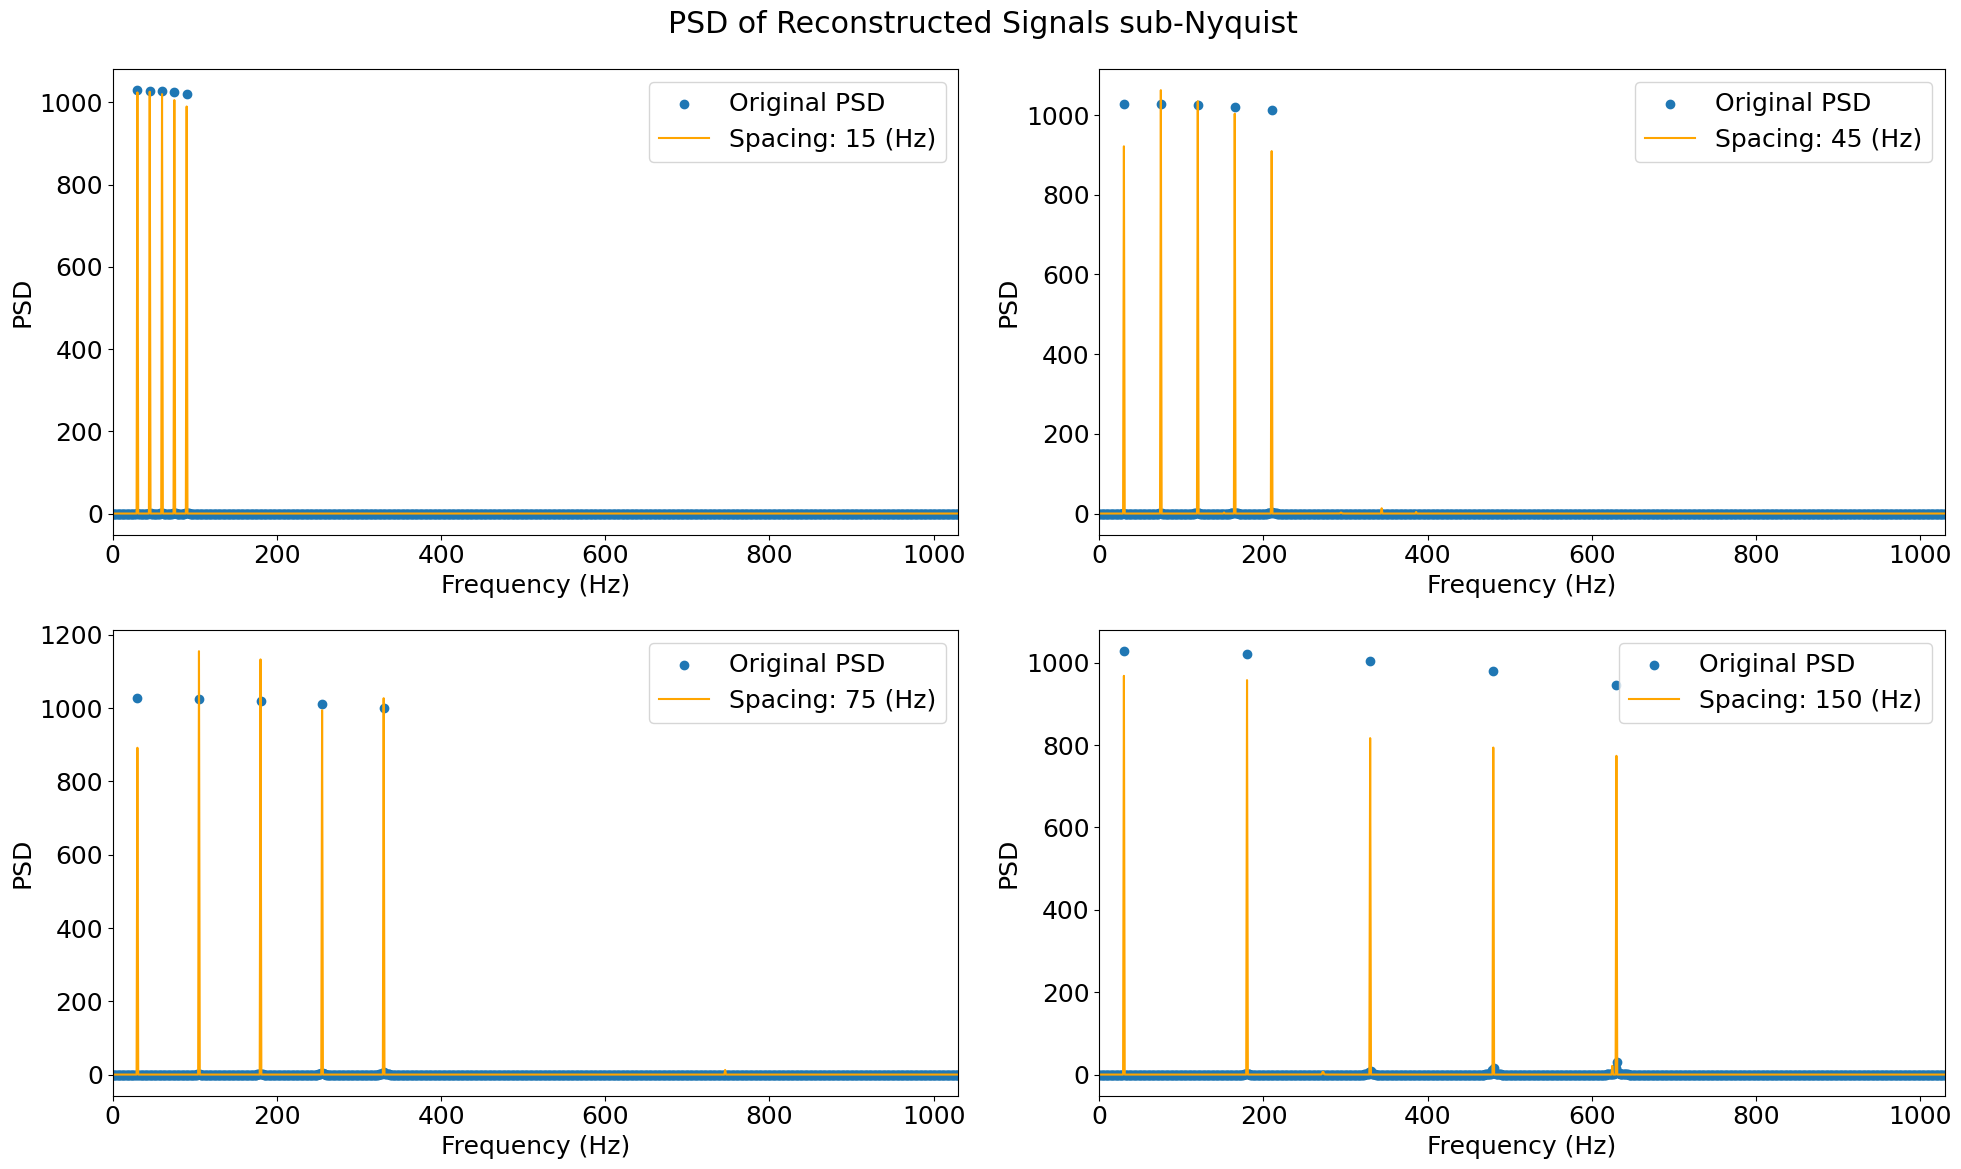

In [ ]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(PSD_sub_spacing):
    axs[i].scatter(frequency_x, np.abs(PSD_orig_spacing[i]), label = "Original PSD", color = "#1f77b4")
    axs[i].plot(frequency_x, np.abs(pt), label = "Spacing: " + str(increments[i]) + " (Hz)", color = "orange")
    axs[i].set_xlim(0,1030)
    axs[i].set_xlabel("Frequency (Hz)")
    axs[i].set_ylabel("PSD")
    axs[i].legend()

fig.suptitle("PSD of Reconstructed Signals sub-Nyquist")
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

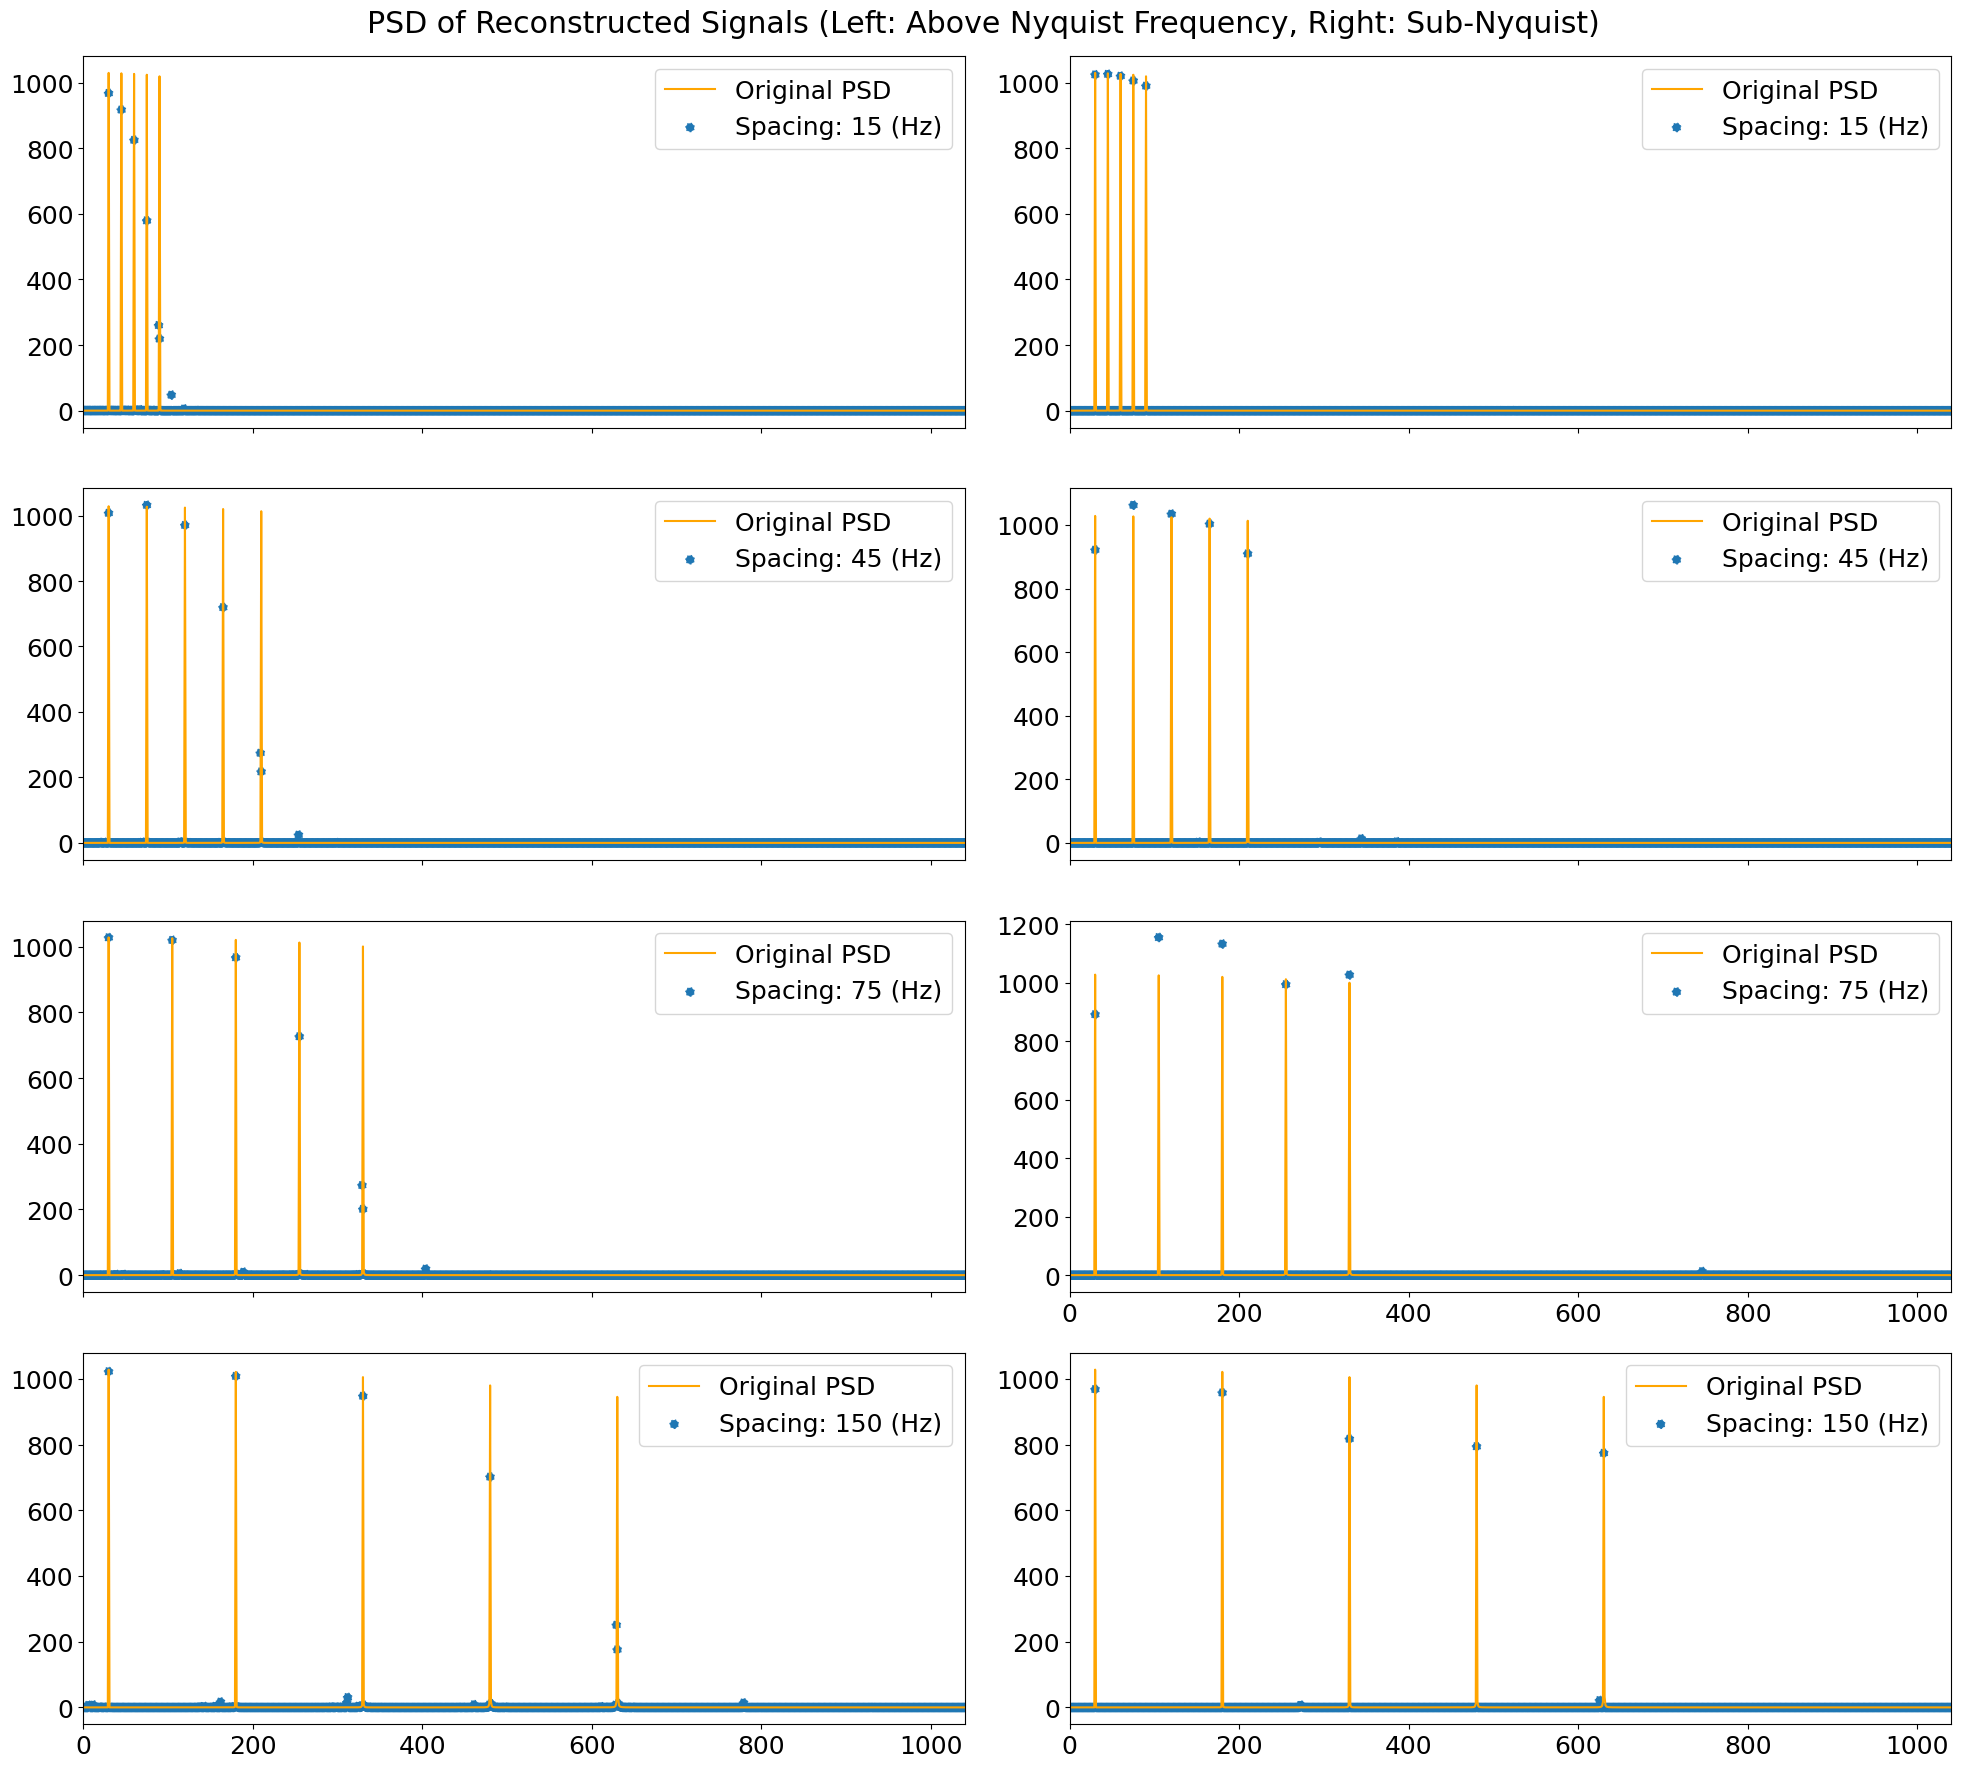

In [8]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(4,2)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(PSD_sub_spacing):

    axs[2*i].plot(np.abs(PSD_orig_spacing[i]), label = "Original PSD", color = "orange")
    axs[2*i].scatter(frequency_x, np.abs(PSD_reg_spacing[i]), linestyle = "dotted", label = "Spacing: " + str(increments[i]) + " (Hz)", color = "#1f77b4")
    axs[2*i].set_xlim(0,1040)
    axs[2*i].legend()
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

    axs[2*i+1].plot(np.abs(PSD_orig_spacing[i]), label = "Original PSD", color = "orange")
    axs[2*i+1].scatter(frequency_x, np.abs(pt), linestyle = "dotted", label = "Spacing: " + str(increments[i]) + " (Hz)", color = "#1f77b4")
    axs[2*i+1].set_xlim(0,1040)
    axs[2*i+1].legend()
    if i != len(axs) - 1:
        axs[i+1].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals (Left: Above Nyquist Frequency, Right: Sub-Nyquist)")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

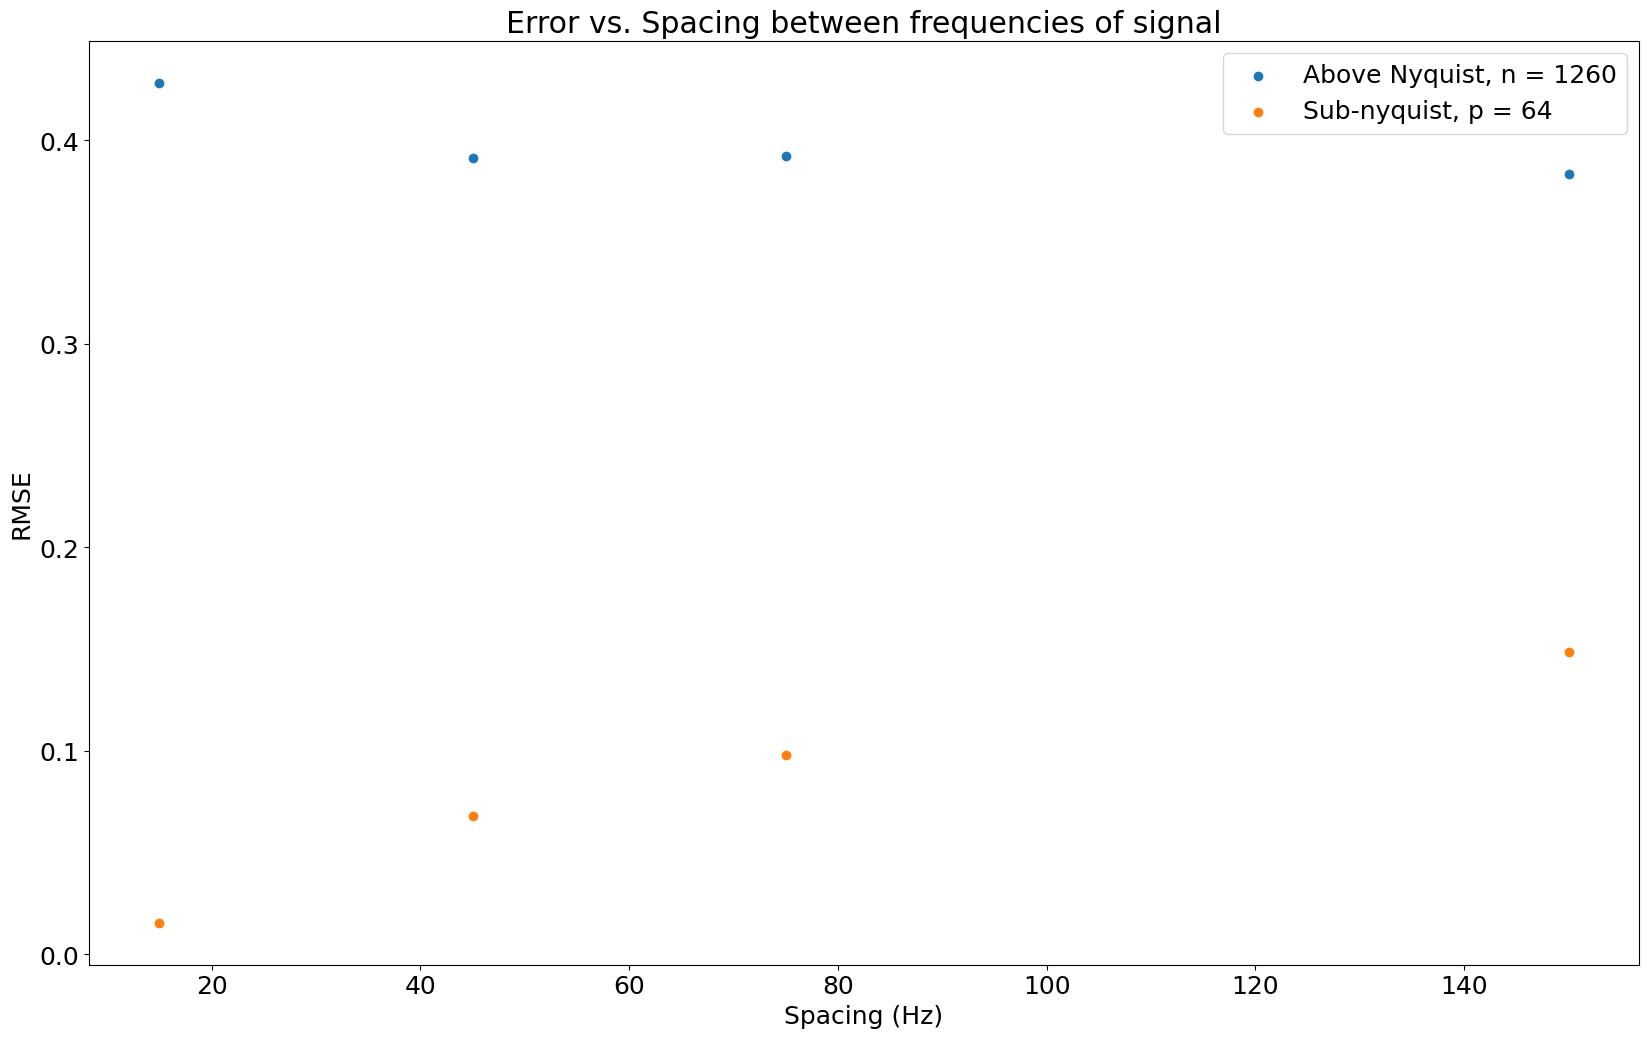

In [9]:
plt.scatter(increments, error_reg_spacing, label = "Above Nyquist, n = 1260")
plt.scatter(increments, error_sub_spacing, label = "Sub-nyquist, p = 64")
plt.legend()
plt.title("Error vs. Spacing between frequencies of signal")
plt.xlabel("Spacing (Hz)")
plt.ylabel("RMSE")
plt.show()

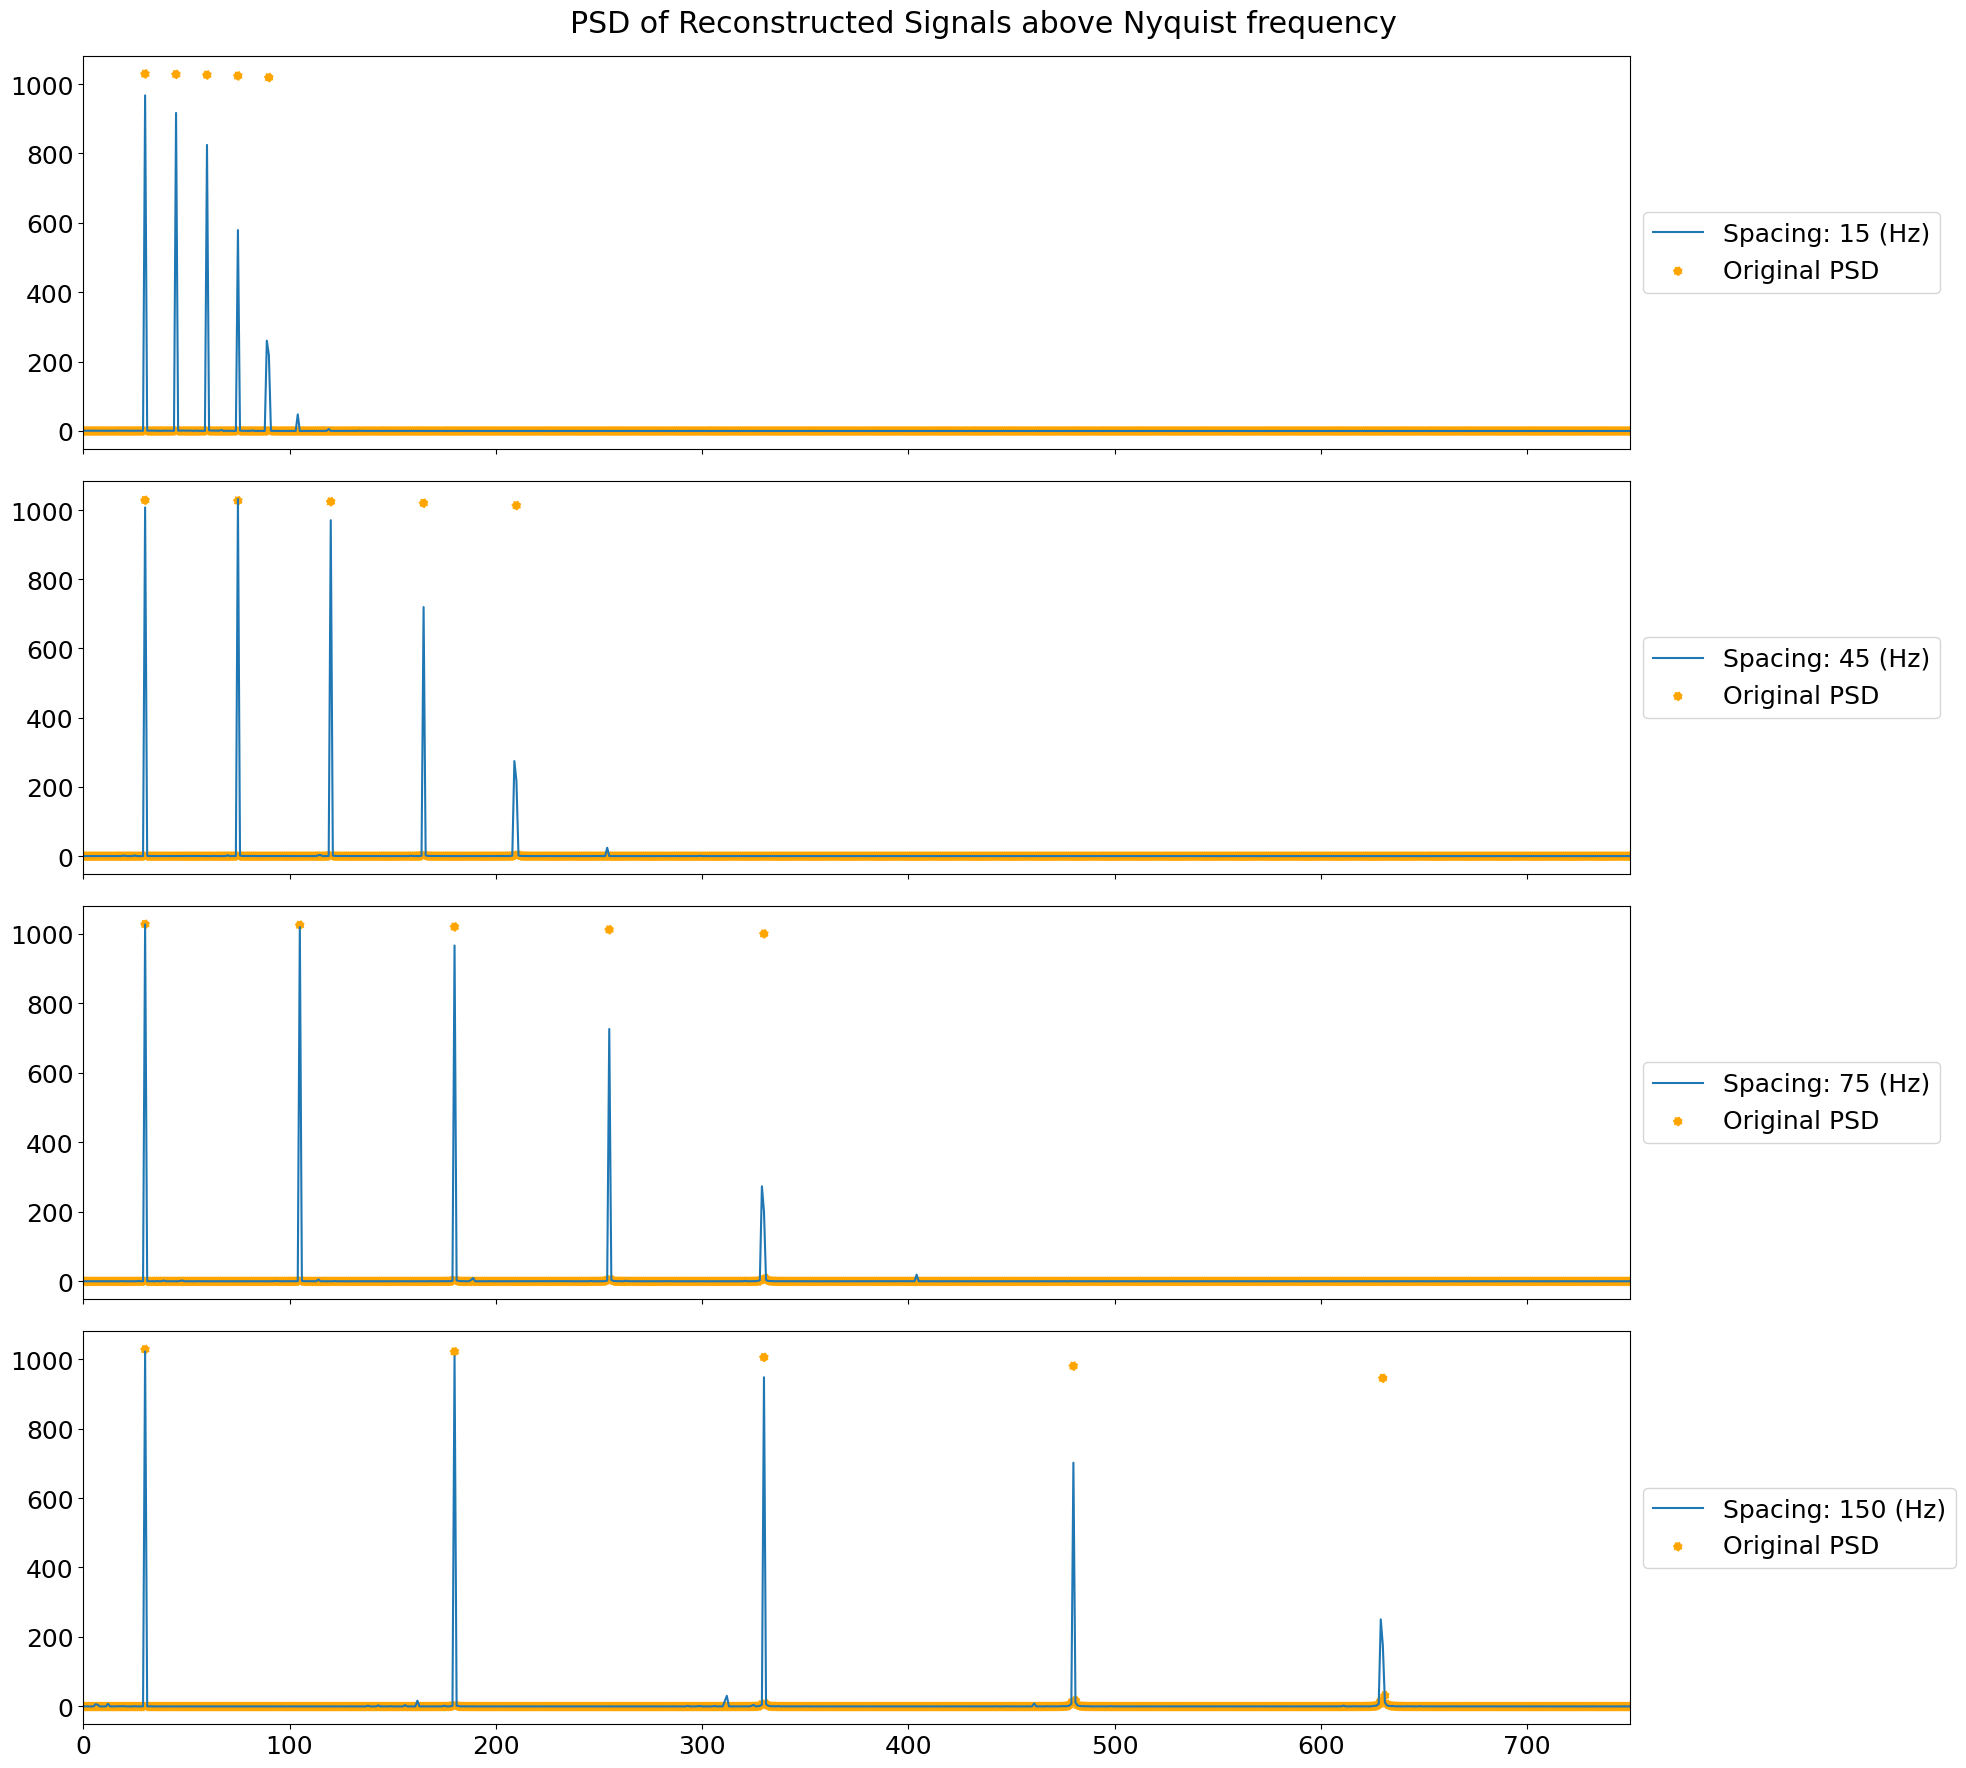

In [10]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(4,1)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(PSD_reg_spacing):
    axs[i].plot(np.abs(pt), label = "Spacing: " + str(increments[i]) + " (Hz)")
    axs[i].scatter(frequency_x, np.abs(PSD_orig_spacing[i]), linestyle = "dotted", label = "Original PSD", color = "orange")
    axs[i].set_xlim(0,750)
    axs[i].legend(loc='center left', bbox_to_anchor=(1, 0.5))
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals above Nyquist frequency")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

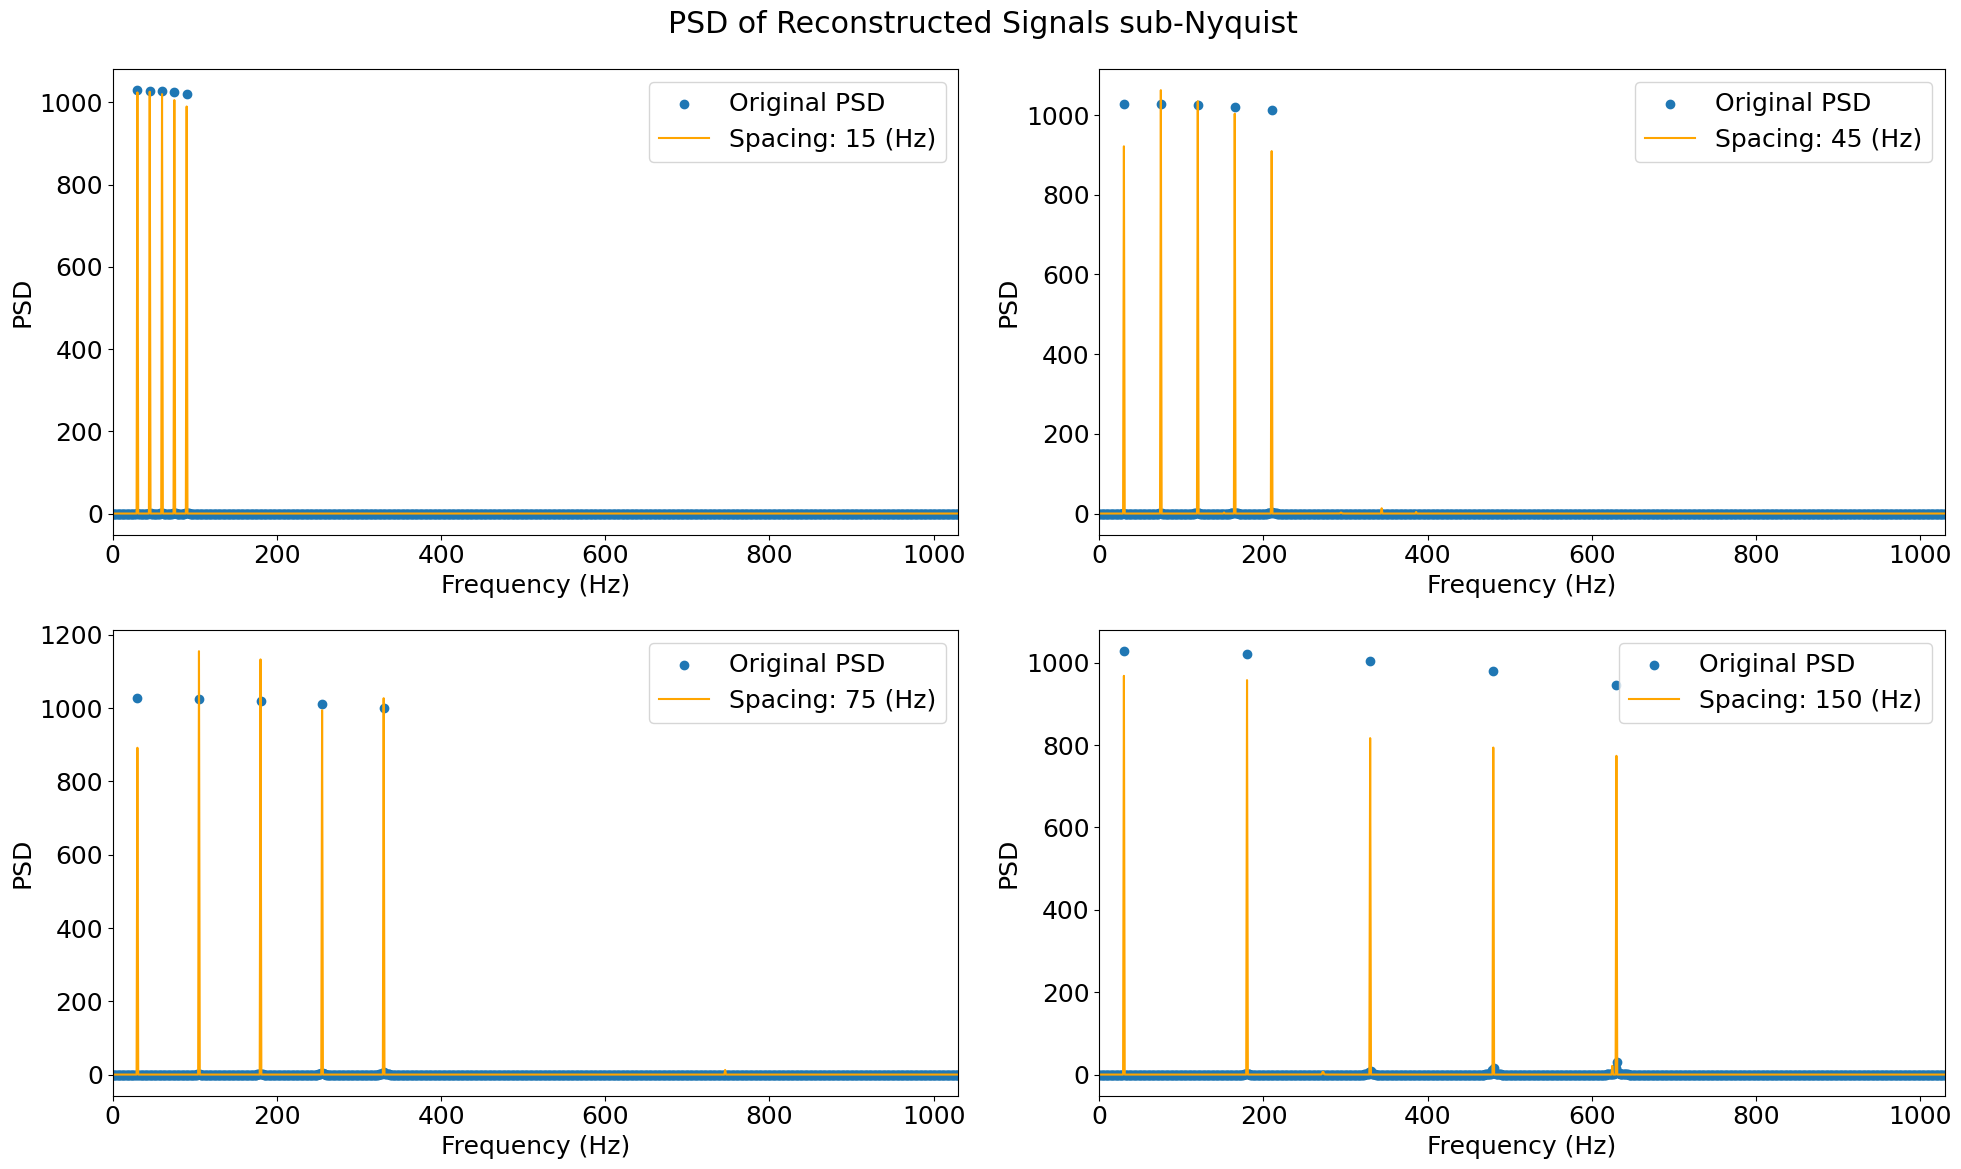

In [11]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(2,2)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(PSD_sub_spacing):
    axs[i].scatter(frequency_x, np.abs(PSD_orig_spacing[i]), label = "Original PSD", color = "#1f77b4")
    axs[i].plot(frequency_x, np.abs(pt), label = "Spacing: " + str(increments[i]) + " (Hz)", color = "orange")
    axs[i].set_xlim(0,1030)
    axs[i].set_xlabel("Frequency (Hz)")
    axs[i].set_ylabel("PSD")
    axs[i].legend()
    # if i != len(axs) - 1:
    #     axs[i].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals sub-Nyquist")
plt.tight_layout(rect=[0, 0, 1, 1])
plt.show()

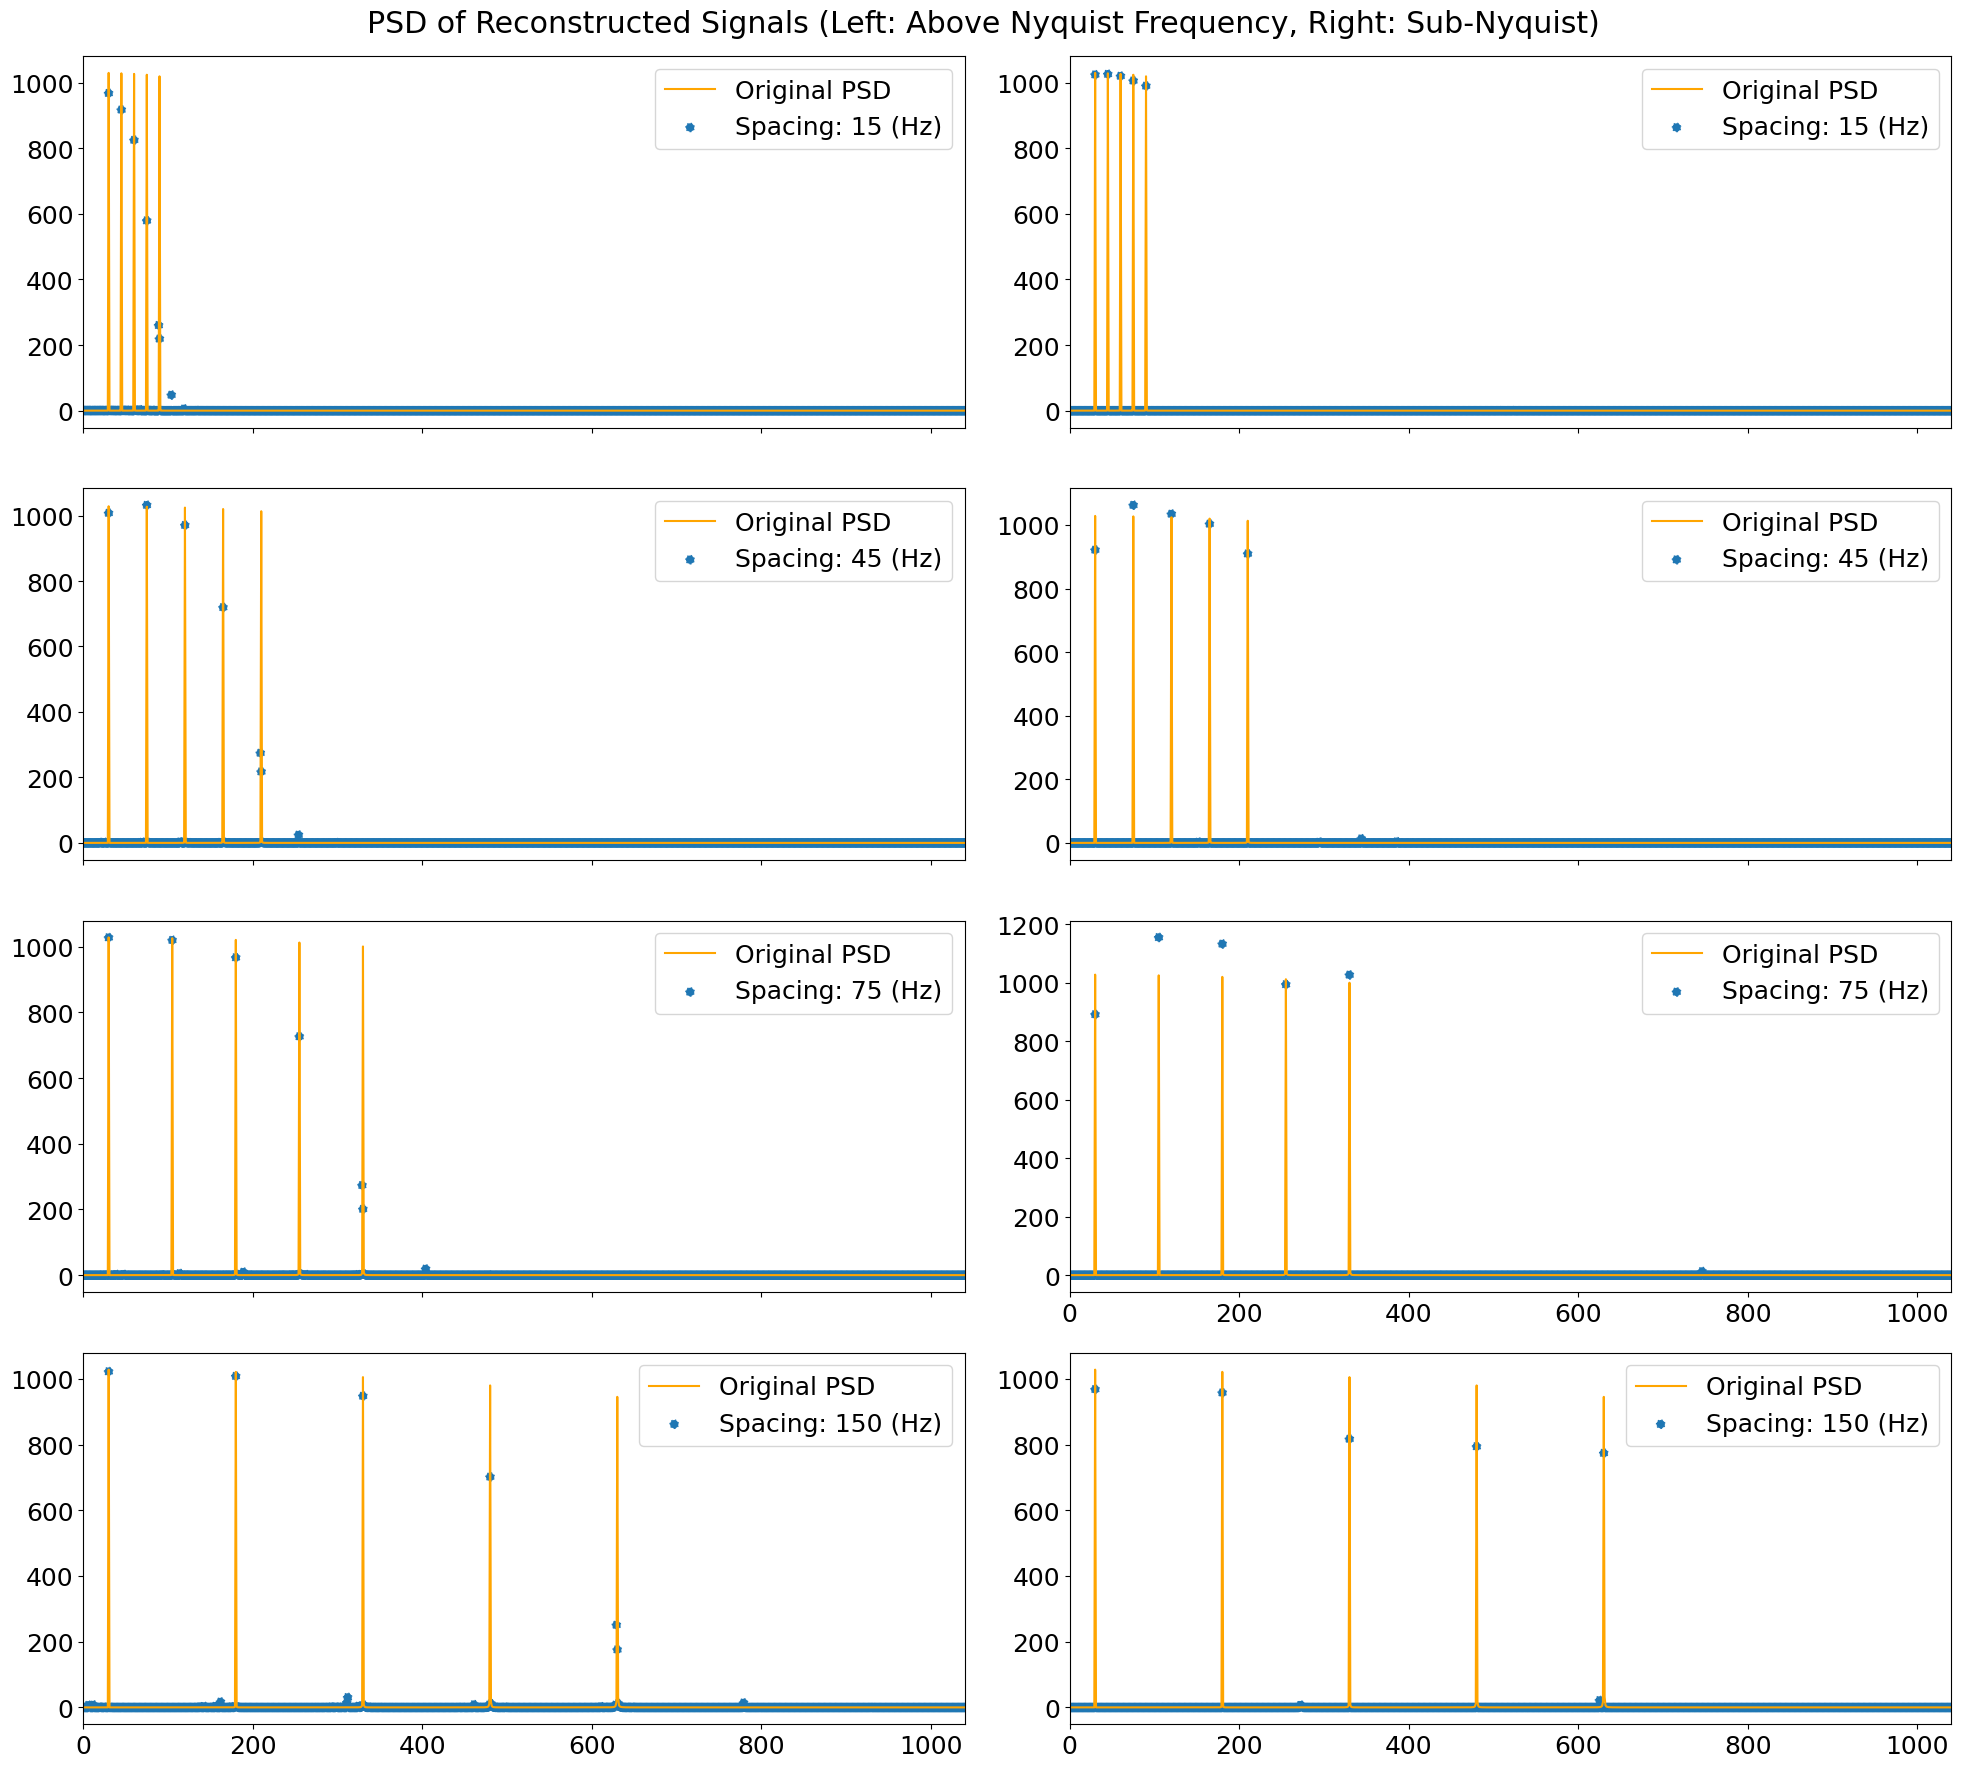

In [12]:
plt.rcParams['figure.figsize'] = [20, 12]
plt.rcParams.update({'font.size': 18})

fig,axs = plt.subplots(4,2)
axs = axs.reshape(-1)
ylim = (-2,2)
ylim_uni = (ylim[0]*3000, ylim[1]*3000)

for i, pt in enumerate(PSD_sub_spacing):

    axs[2*i].plot(np.abs(PSD_orig_spacing[i]), label = "Original PSD", color = "orange")
    axs[2*i].scatter(frequency_x, np.abs(PSD_reg_spacing[i]), linestyle = "dotted", label = "Spacing: " + str(increments[i]) + " (Hz)", color = "#1f77b4")
    axs[2*i].set_xlim(0,1040)
    axs[2*i].legend()
    if i != len(axs) - 1:
        axs[i].set_xticklabels([])  # Hide x-tick labels

    axs[2*i+1].plot(np.abs(PSD_orig_spacing[i]), label = "Original PSD", color = "orange")
    axs[2*i+1].scatter(frequency_x, np.abs(pt), linestyle = "dotted", label = "Spacing: " + str(increments[i]) + " (Hz)", color = "#1f77b4")
    axs[2*i+1].set_xlim(0,1040)
    axs[2*i+1].legend()
    if i != len(axs) - 1:
        axs[i+1].set_xticklabels([])  # Hide x-tick labels

fig.suptitle("PSD of Reconstructed Signals (Left: Above Nyquist Frequency, Right: Sub-Nyquist)")
plt.tight_layout(rect=[0, -0.5, 1, 1.01])
plt.show()

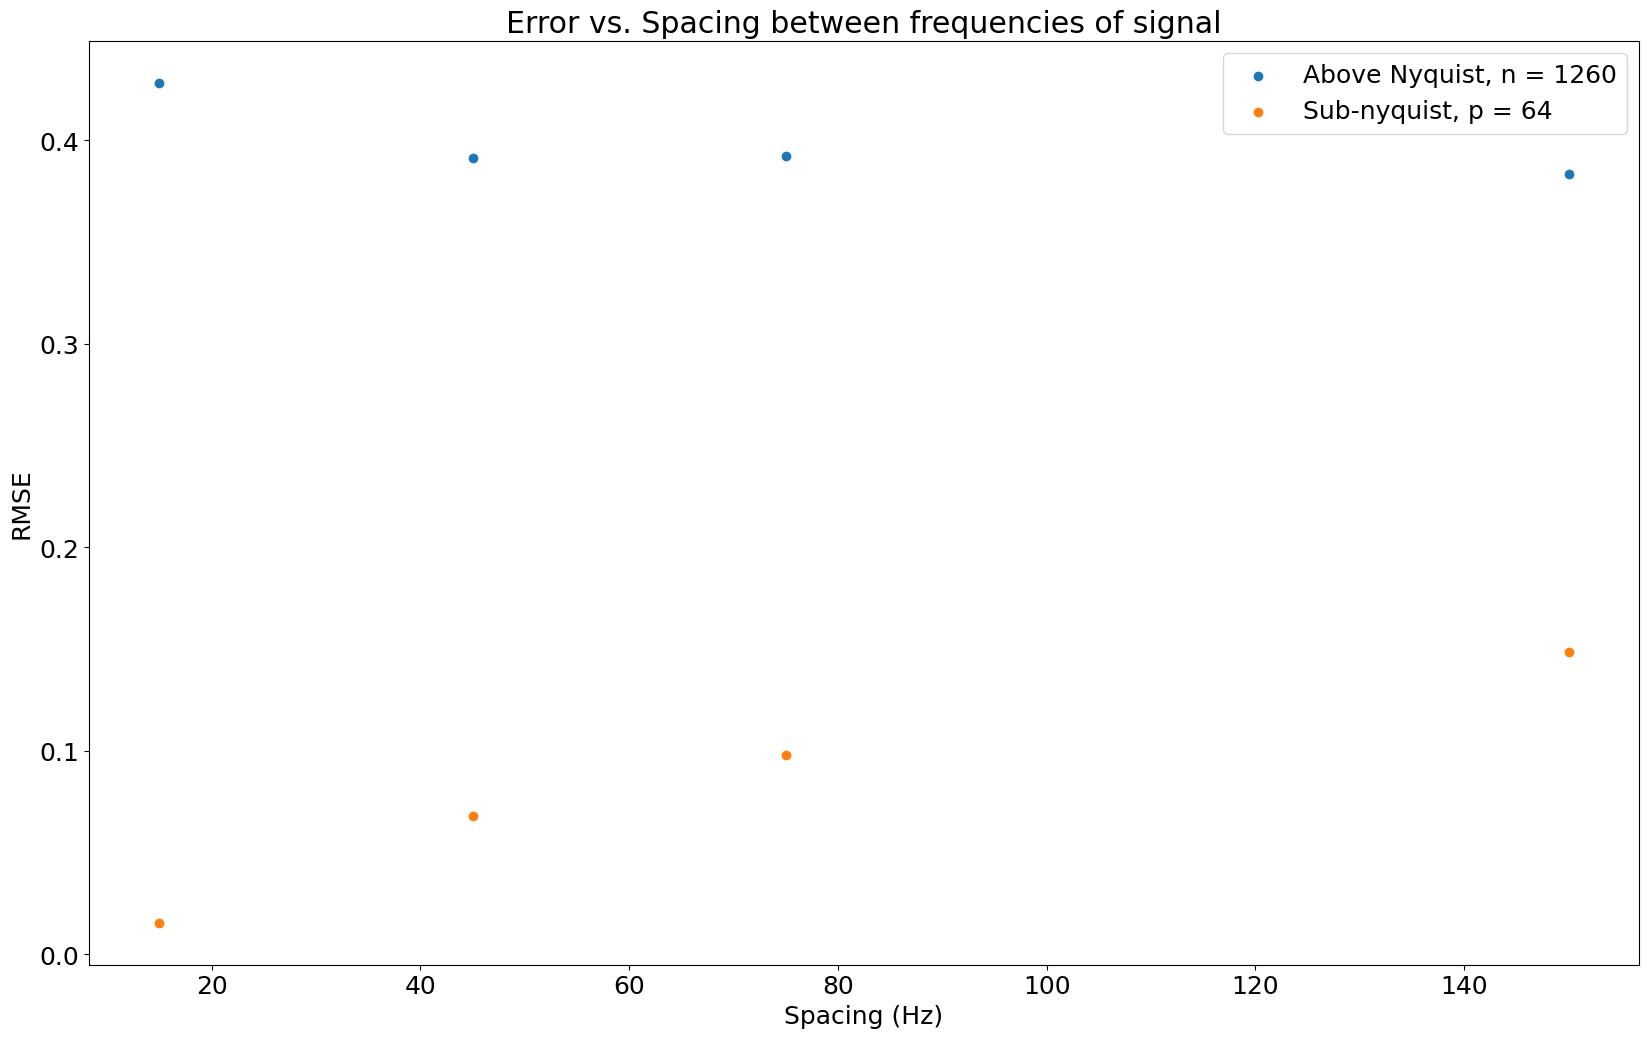

In [13]:
plt.scatter(increments, error_reg_spacing, label = "Above Nyquist, n = 1260")
plt.scatter(increments, error_sub_spacing, label = "Sub-nyquist, p = 64")
plt.legend()
plt.title("Error vs. Spacing between frequencies of signal")
plt.xlabel("Spacing (Hz)")
plt.ylabel("RMSE")
plt.show()